In [1]:
#import libraries
import pandas as pd
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import geo data
geo_data = gpd.read_file("Police Precincts.geojson")

#rename column
geo_data.rename(columns={'precinct':'Precinct'},inplace=True)

#convert data type for Precinct to int64, so it can match with the nypd Precinct column data type for merging purposes
geo_data['Precinct']= pd.to_numeric(geo_data['Precinct'],errors='coerce')

#check data
geo_data

,Precinct,shape_area,shape_leng,geometry
0,1,47285006.2592,80093.5344285,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5,18094527.4385,18807.1249114,"MULTIPOLYGON (((-73.98864 40.72293, -73.98869 ..."
2,6,22143015.2188,27255.9911197,"MULTIPOLYGON (((-74.00915 40.74251, -74.00895 ..."
3,7,18366669.928,17287.5444926,"MULTIPOLYGON (((-73.97346 40.71896, -73.97357 ..."
4,9,21395386.2669,19772.5107407,"MULTIPOLYGON (((-73.97161 40.72672, -73.97163 ..."
...,...,...,...,...
72,115,114119713.711,60059.4107576,"MULTIPOLYGON (((-73.85892 40.76241, -73.85931 ..."
73,120,232327994.245,92945.6974029,"MULTIPOLYGON (((-74.05357 40.6037, -74.05407 4..."
74,121,475577637.857,136811.464647,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
75,122,454852053.697,154842.385071,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [3]:
#check data types
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Precinct    77 non-null     int64   
 1   shape_area  77 non-null     object  
 2   shape_leng  77 non-null     object  
 3   geometry    77 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.5+ KB


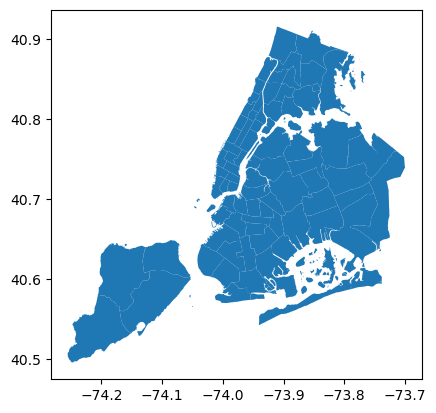

In [4]:
#lets check the original plot of the geo data
geo_data.plot()

#show
plt.show()

## Question 1

**Can we visualize the level of incident complaints (2021-2024) across NYPD precincts on a map?"**

Lets read the cleaned_nypd_dataset and create a new dataframe based on the value counts of the Precinct column

In [5]:
#read file
nypd = pd.read_parquet("cleaned_nypd_dataset.parquet") 
nypd

,Precinct,Borough,Date of Occurrence,Crime Outcome,Jurisdiction Description,Classification Code,Offense Level,Specific Location of Occurrence,Offense Description,Patrol Borough,Premise Description,Date Event was Reported to Police,Suspect's Age Group,Suspect's Race,Suspect's Sex,Transit District,Victim's Age Group,Victim's Race,Victim's Sex
0,42,BRONX,2021-01-03,COMPLETED,N.Y. POLICE DEPT,364,MISDEMEANOR,INSIDE,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,2024-01-05,NaN,NaN,NaN,<NA>,NaN,NaN,E
1,47,BRONX,2021-01-03,COMPLETED,N.Y. POLICE DEPT,107,FELONY,INSIDE,BURGLARY,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,2024-01-04,NaN,NaN,NaN,<NA>,65+,BLACK,M
2,115,QUEENS,2021-01-03,COMPLETED,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,PATROL BORO QUEENS NORTH,RESIDENCE - APT. HOUSE,2024-04-23,18-24,WHITE,M,<NA>,25-44,WHITE,M
3,52,BRONX,2021-01-03,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,2024-01-03,25-44,AMERICAN INDIAN/ALASKAN NATIVE,M,<NA>,45-64,ASIAN / PACIFIC ISLANDER,M
4,43,BRONX,2021-01-05,COMPLETED,N.Y. POLICE DEPT,107,FELONY,INSIDE,BURGLARY,PATROL BORO BRONX,RESIDENCE - APT. HOUSE,2024-01-10,NaN,NaN,M,<NA>,45-64,ASIAN / PACIFIC ISLANDER,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281282,111,QUEENS,2024-06-30,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,FRONT OF,HARRASSMENT 2,PATROL BORO QUEENS NORTH,STREET,2024-06-30,45-64,WHITE,M,<NA>,25-44,WHITE,F
281283,113,QUEENS,2024-06-30,COMPLETED,PORT AUTHORITY,344,MISDEMEANOR,NaN,ASSAULT 3 & RELATED OFFENSES,PATROL BORO QUEENS SOUTH,AIRPORT TERMINAL,2024-06-30,25-44,WHITE HISPANIC,F,<NA>,25-44,WHITE HISPANIC,M
281284,105,QUEENS,2024-06-30,COMPLETED,N.Y. POLICE DEPT,118,FELONY,INSIDE,DANGEROUS WEAPONS,PATROL BORO QUEENS SOUTH,RESIDENCE-HOUSE,2024-06-30,25-44,BLACK,M,<NA>,NaN,NaN,E
281285,101,QUEENS,2024-06-30,COMPLETED,N.Y. POLICE DEPT,126,FELONY,FRONT OF,MISCELLANEOUS PENAL LAW,PATROL BORO QUEENS SOUTH,STREET,2024-06-30,NaN,NaN,NaN,<NA>,65+,BLACK,M


In [6]:
#get the value counts for the Precinct column and sort the index. This will match the order of the Precinct column in the geo data
nypd['Precinct'].value_counts().sort_index()

#add it to a variable
precinct_counts = nypd['Precinct'].value_counts().sort_index()

#check
precinct_counts

Precinct
1      4399
5      2677
6      2859
7      2585
9      2549
       ... 
115    5413
120    4872
121    3472
122    2693
123    1481
Name: count, Length: 77, dtype: int64

In [7]:
#create a dataframe that mirrors the series
precincts = pd.DataFrame({'Precinct': precinct_counts.index,'Total Count': precinct_counts.values})

precincts

,Precinct,Total Count
0,1,4399
1,5,2677
2,6,2859
3,7,2585
4,9,2549
...,...,...
72,115,5413
73,120,4872
74,121,3472
75,122,2693


Lets merge both dataframes by the Precinct column

In [8]:
#double check the geo data Precincts so they merge can be successful
geo_data

,Precinct,shape_area,shape_leng,geometry
0,1,47285006.2592,80093.5344285,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5,18094527.4385,18807.1249114,"MULTIPOLYGON (((-73.98864 40.72293, -73.98869 ..."
2,6,22143015.2188,27255.9911197,"MULTIPOLYGON (((-74.00915 40.74251, -74.00895 ..."
3,7,18366669.928,17287.5444926,"MULTIPOLYGON (((-73.97346 40.71896, -73.97357 ..."
4,9,21395386.2669,19772.5107407,"MULTIPOLYGON (((-73.97161 40.72672, -73.97163 ..."
...,...,...,...,...
72,115,114119713.711,60059.4107576,"MULTIPOLYGON (((-73.85892 40.76241, -73.85931 ..."
73,120,232327994.245,92945.6974029,"MULTIPOLYGON (((-74.05357 40.6037, -74.05407 4..."
74,121,475577637.857,136811.464647,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
75,122,454852053.697,154842.385071,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [9]:
#double check the precincts data so they merge can be successful
precincts

,Precinct,Total Count
0,1,4399
1,5,2677
2,6,2859
3,7,2585
4,9,2549
...,...,...
72,115,5413
73,120,4872
74,121,3472
75,122,2693


In [10]:
#merge the data
merged_data = geo_data.merge(precincts)

#check
merged_data

,Precinct,shape_area,shape_leng,geometry,Total Count
0,1,47285006.2592,80093.5344285,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",4399
1,5,18094527.4385,18807.1249114,"MULTIPOLYGON (((-73.98864 40.72293, -73.98869 ...",2677
2,6,22143015.2188,27255.9911197,"MULTIPOLYGON (((-74.00915 40.74251, -74.00895 ...",2859
3,7,18366669.928,17287.5444926,"MULTIPOLYGON (((-73.97346 40.71896, -73.97357 ...",2585
4,9,21395386.2669,19772.5107407,"MULTIPOLYGON (((-73.97161 40.72672, -73.97163 ...",2549
...,...,...,...,...,...
72,115,114119713.711,60059.4107576,"MULTIPOLYGON (((-73.85892 40.76241, -73.85931 ...",5413
73,120,232327994.245,92945.6974029,"MULTIPOLYGON (((-74.05357 40.6037, -74.05407 4...",4872
74,121,475577637.857,136811.464647,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",3472
75,122,454852053.697,154842.385071,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",2693


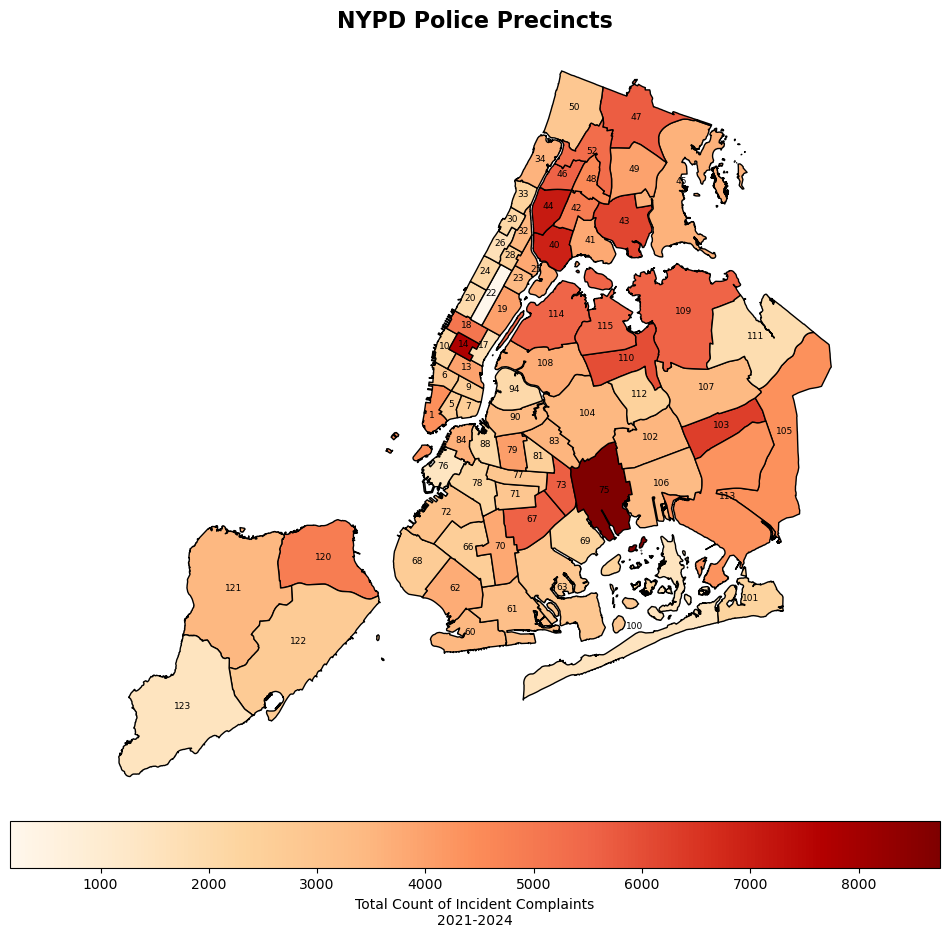

In [12]:
#NOTE: excute the code TWICE

#the code successfully executes on the second run. I believe because after the first error, indicating that 
#the "Image size of 106955x55820 pixels is too large. It must be less than 2^16 in each direction', the system and/or environment
#has learned  how to handle the data

#do chloropeth map
ax = merged_data.plot(column='Total Count',
                      cmap='OrRd',
                      figsize=(12,12),
                      edgecolor='black',
                      legend=True,
                      legend_kwds={'label': 'Total Count of Incident Complaints\n2021-2024','orientation':'horizontal',"pad": 0.01})

#add title
plt.title('NYPD Police Precincts',fontweight='bold',fontsize=16)

#reproject to a projected CRS
merged_data = merged_data.to_crs(epsg=2263)

# Now calculate the centroids
merged_data['center'] = merged_data['geometry'].centroid

# Then proceed with your operation
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data["Precinct"]):
    ax.text(x, y, label, fontsize=6.5, ha='center')

#turn off axis
ax.set_axis_off()

#show
plt.show()

## Question 2

**What are the Top 5 police precincts that have the highest number of incident complaints? What about the Bottom 5?**

In [13]:
#Top 5 Precincts with the most number of incident complaints
precincts.sort_values('Total Count',ascending=False).head()

,Precinct,Total Count
46,75,8752
7,14,7798
26,44,7082
22,40,6922
60,103,6306


In [14]:
#Bottom 5 Precincts with the least number of incident complaints
precincts.sort_values('Total Count',ascending=False).tail()

,Precinct,Total Count
16,26,1657
76,123,1481
57,100,1481
47,76,1422
12,22,163
